Test Case:

VanArsdel is a company that manufactures and sells sporting goods. The company has offices in the United States(US) and several other countries. It's sales comprise of US sales and International sales. VanArsdel's sales come from its owned manufactured products, as well as other manufacturers' products. VanArsdel International sales transaction are available as comma separated values (csv) files.

Task:
1. Join the tables CountryPopulation and InternationalSales. For each row there should be the specified country population for the specified year.
2. Discover the regional pattern of VanArdsel revenue. Which months or quarters or years brings the most of the revenue to the company? Provide a simple visualization and/or written comment to describe.


Data Analysis process:
1. Identify the business questions you'd like to answer.
2. Collect the raw data sets you'll need to help you answer the identified questions.
3. Clean the data to prepare it for analysis
4. Analyze the data.
5. Interpret the results of your analysis.

In [1]:
import os
import pandas as pd
import glob
from datetime import datetime

In [2]:
#GET THE CURRENT WORKING DIRECTORY

os.getcwd()

'C:\\Users\\emdfa'

In [3]:
#CHANGE THE WORKING DIRECTORY TO YOUR PREFERRED LOCATION (OR LOCATION OF YOUR DATA SET)

os.chdir(r'C:\Users\emdfa\Desktop\Python\VanArdsel data\International')
new_dir = os.getcwd()
print(new_dir)

C:\Users\emdfa\Desktop\Python\VanArdsel data\International


In [4]:
#LIST ONLY THE CSV FILES FROM THE WORKING DIRECTORY

csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['CA Sales.csv', 'DE Sales.csv', 'FR Sales.csv', 'MX Sales.csv']

In [26]:
#COMBINING MULTIPLE FILES WITH THE SIMILAR TABLE STRUCTURE

df_merged = pd.concat([pd.read_csv(f) for f in csv_files ], ignore_index=True)
df_merged

,ProductID,Date,Zip,Units,Revenue,Country
0,725,1/15/1999,H1B,1,115.4475,Canada
1,2235,1/15/1999,H1B,2,131.1450,Canada
2,713,1/15/1999,H1B,1,160.0725,Canada
3,574,6/5/2002,H1B,1,869.1375,Canada
4,94,2/15/1999,H1B,1,866.2500,Canada
...,...,...,...,...,...,...
841142,1313,7/10/2014,7580,1,299.1500,Mexico
841143,1496,7/10/2014,7890,1,419.9000,Mexico
841144,1538,7/10/2014,7760,1,288.6500,Mexico
841145,2224,7/10/2014,8520,1,62.9500,Mexico


In [6]:
#EXAMINE THE DATA, CHECK FOR THE SHAPE AND THE DATA TYPES FOR EACH COLUMN

print(df_merged.dtypes)

ProductID      int64
Date          object
Zip           object
Units          int64
Revenue      float64
Country       object
dtype: object


In [7]:
#FOR THE CASE OF THIS DATAFRAME, THE DATE IS AN OBJECT.
#WE NEED TO CLEAN THE DATA FIRST BEFORE WE CAN PROCEED WITH THE MERGING OF DATAFRAMES

#FOR DATA CLEANING, WE'LL HAVE TO CONVERT THE DATE TYPE (STRING) TO DATETIME OBJECT USING datetime.strptime()

def convert_to_date(datetime_str):
    datetime_object = datetime.strptime(datetime_str, '%m/%d/%Y').date()
    return datetime_object

In [8]:
#WE WILL USE THE df.apply() TO APPLY THE FUNCTION WE JUST CREATED TO OUR MERGED DATAFRAME

df_merged['Date'] = df_merged['Date'].apply(convert_to_date)

In [9]:
#CHECK THE CHANGES IN THE DATAFRAME

df_merged

,ProductID,Date,Zip,Units,Revenue,Country
0,725,1999-01-15,H1B,1,115.4475,Canada
1,2235,1999-01-15,H1B,2,131.1450,Canada
2,713,1999-01-15,H1B,1,160.0725,Canada
3,574,2002-06-05,H1B,1,869.1375,Canada
4,94,1999-02-15,H1B,1,866.2500,Canada
...,...,...,...,...,...,...
841142,1313,2014-07-10,7580,1,299.1500,Mexico
841143,1496,2014-07-10,7890,1,419.9000,Mexico
841144,1538,2014-07-10,7760,1,288.6500,Mexico
841145,2224,2014-07-10,8520,1,62.9500,Mexico


In [29]:
#WE WILL CREATE 2 NEW COLUMNS, 'YEAR' AND 'MONTH', TO MAKE OUR MERGING SIMPLE

df_merged['Year'] = pd.DatetimeIndex(df_merged['Date']).year
df_merged['Month'] = pd.DatetimeIndex(df_merged['Date']).month

df_merged = df_merged [['ProductID', 'Date', 'Year', 'Month', 'Zip', 'Units', 'Revenue', 'Country']]
df_merged = df_merged [['ProductID', 'Date','Month', 'Year', 'Zip', 'Units', 'Revenue', 'Country']]
df_merged

,ProductID,Date,Month,Year,Zip,Units,Revenue,Country
0,725,1/15/1999,1,1999,H1B,1,115.4475,Canada
1,2235,1/15/1999,1,1999,H1B,2,131.1450,Canada
2,713,1/15/1999,1,1999,H1B,1,160.0725,Canada
3,574,6/5/2002,6,2002,H1B,1,869.1375,Canada
4,94,2/15/1999,2,1999,H1B,1,866.2500,Canada
...,...,...,...,...,...,...,...,...
841142,1313,7/10/2014,7,2014,7580,1,299.1500,Mexico
841143,1496,7/10/2014,7,2014,7890,1,419.9000,Mexico
841144,1538,7/10/2014,7,2014,7760,1,288.6500,Mexico
841145,2224,7/10/2014,7,2014,8520,1,62.9500,Mexico


In [11]:
#NOW WE WILL IMPORT THE EXCEL FILE WHICH CONTAINS THE COUNTRY AND THEIR POPULATION/YEAR

dfpop = pd.read_excel(r'C:\Users\emdfa\Desktop\Python\VanArdsel data\Country Population by Year1.xlsx')
dfpop

,Country Name,Year,Population
0,Canada,1999,30499200
1,Canada,2000,30769700
2,Canada,2001,31081900
3,Canada,2002,31362000
4,Canada,2003,31676000
...,...,...,...
75,USA,2010,309347057
76,USA,2011,311721632
77,USA,2012,314112078
78,USA,2013,316497531


In [12]:
#LET'S CHECK FIRST THE DATA TYPES OF THIS DATAFRAME

print(dfpop.dtypes)

Country Name    object
Year             int64
Population       int64
dtype: object


In [13]:
#FROM THE COLUMN, RENAME THE "Country Name" TO 'Country'

dfpop = dfpop.rename(columns = {'Country Name':'Country'})
dfpop

,Country,Year,Population
0,Canada,1999,30499200
1,Canada,2000,30769700
2,Canada,2001,31081900
3,Canada,2002,31362000
4,Canada,2003,31676000
...,...,...,...
75,USA,2010,309347057
76,USA,2011,311721632
77,USA,2012,314112078
78,USA,2013,316497531


In [15]:
#WE WILL THEN MERGE THIS POPULATION/YEAR DATAFRAME WITH INTERNATIONAL SALES DATAFRAME

merged_final = pd.merge(df_merged, dfpop, on=["Country", "Year"])
merged_final

,ProductID,Date,Year,Month,Zip,Units,Revenue,Country,Population
0,725,1999-01-15,1999,1,H1B,1,115.4475,Canada,30499200
1,2235,1999-01-15,1999,1,H1B,2,131.1450,Canada,30499200
2,713,1999-01-15,1999,1,H1B,1,160.0725,Canada,30499200
3,94,1999-02-15,1999,2,H1B,1,866.2500,Canada,30499200
4,609,1999-02-15,1999,2,H1B,1,778.8375,Canada,30499200
...,...,...,...,...,...,...,...,...,...
823457,1313,2014-07-10,2014,7,7580,1,299.1500,Mexico,125385833
823458,1496,2014-07-10,2014,7,7890,1,419.9000,Mexico,125385833
823459,1538,2014-07-10,2014,7,7760,1,288.6500,Mexico,125385833
823460,2224,2014-07-10,2014,7,8520,1,62.9500,Mexico,125385833


In [16]:
sort_by_revenue = merged_final.sort_values(by=['Revenue'], ascending = False)
sort_by_revenue

,ProductID,Date,Year,Month,Zip,Units,Revenue,Country,Population
303772,495,1999-03-15,1999,3,75213 CEDEX 16,77,43194.11,France,60496715
340126,495,2002-03-29,2002,3,75213 CEDEX 16,40,33600.00,France,61805267
366328,495,2003-04-02,2003,4,75213 CEDEX 16,52,32006.52,France,62244884
409016,495,2001-04-02,2001,4,75213 CEDEX 16,51,29473.92,France,61357431
382808,495,2000-04-01,2000,4,75213 CEDEX 16,42,24255.00,France,60912498
...,...,...,...,...,...,...,...,...,...
818950,2209,2014-06-25,2014,6,9540,1,0.00,Mexico,125385833
295260,2302,2014-06-30,2014,6,45897,1,0.00,Germany,80889505
606581,673,2014-06-30,2014,6,75065 CEDEX 02,1,0.00,France,66206930
298200,673,2014-06-30,2014,6,22417,1,0.00,Germany,80889505


In [31]:
df_canada = merged_final.query("Country == 'Canada'")
df_germany = merged_final.query("Country == 'Germany'")
df_france = merged_final.query("Country == 'France'")
df_mexico = merged_final.query("Country == 'Mexico'")

df_canada
df_france

#WE HAVE CREATED 4 DATAFRAMES TO EXAMINE THE REVENUE OF EACH INTERNATIONAL(COUNTRY) SALES EVERY YEAR OR MONTH

,ProductID,Date,Year,Month,Zip,Units,Revenue,Country,Population
301957,726,1999-01-15,1999,1,75056 CEDEX 01,1,115.45,France,60496715
301958,1909,1999-01-15,1999,1,75056 CEDEX 01,2,398.90,France,60496715
301959,1961,1999-02-15,1999,2,75056 CEDEX 01,1,97.07,France,60496715
301960,1517,1999-02-15,1999,2,75056 CEDEX 01,1,141.65,France,60496715
301961,606,1999-02-15,1999,2,75056 CEDEX 01,1,314.74,France,60496715
...,...,...,...,...,...,...,...,...,...
610603,780,2014-12-18,2014,12,75010,1,346.45,France,66206930
610604,2275,2014-12-18,2014,12,75172 CEDEX 17,1,393.70,France,66206930
610605,779,2014-12-18,2014,12,75010,1,346.45,France,66206930
610606,791,2014-12-19,2014,12,75010,1,70.82,France,66206930


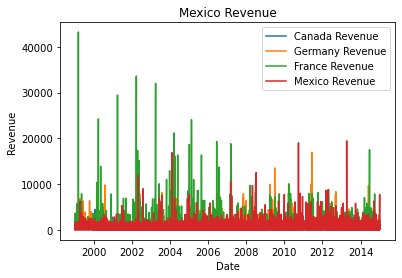

In [18]:
import matplotlib.pyplot as plt

ax1 = df_canada.plot(x='Date', y='Revenue', title = 'Canada Revenue')
ax2 = df_germany.plot(ax = ax1, x='Date', y='Revenue', title = 'Germany Revenue')
ax3 = df_france.plot(ax = ax2, x='Date', y='Revenue', title = 'France Revenue')
df_mexico.plot(ax = ax3, x='Date', y='Revenue', ylabel = 'Revenue', title = 'Mexico Revenue')

plt.legend(['Canada Revenue', 'Germany Revenue', 'France Revenue', 'Mexico Revenue'])

#WE WILL COMBINE ALL THE PLOTS (DATE VS. REVENUE)

From this graph, we can see that France has been producing the most revenue while Canada got the least revenue.

<AxesSubplot:title={'center':'Mexico Revenue'}, xlabel='Date'>

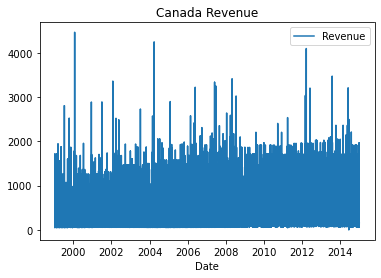

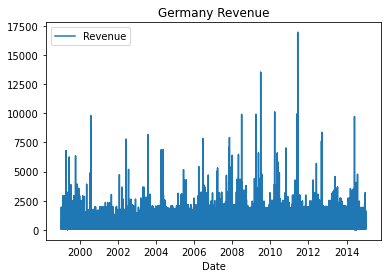

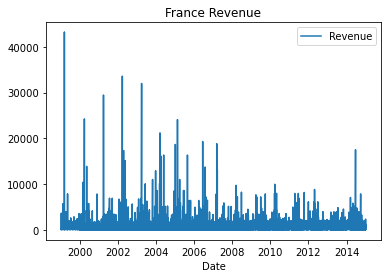

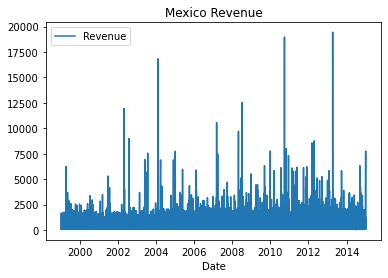

In [19]:
#LET'S TRY TO OBSERVE THE INDIVIDUAL PLOTS OF EACH COUNTRY:

df_canada.plot(x='Date', y='Revenue', title = 'Canada Revenue')
df_germany.plot(x='Date', y='Revenue', title = 'Germany Revenue')
df_france.plot(x='Date', y='Revenue', title = 'France Revenue')
df_mexico.plot(x='Date', y='Revenue', title = 'Mexico Revenue')

In [20]:
# To further explain each graphs:
# 1. Canada got a stable revenue of around 1000-2000 and peaks of 4000$ at the years 2000, 2004, and 2012, but the amount is 
# still small compared to the other countries.

# 2. Germany has a stable revenue of around 2500 from year 2000 to 2014, and a peak of almost 17,500$ around the 2nd quarter
# of 2011.

# 3. France was able to produce a peak of 40,000$ revenue for the year 1999, and still got some good revenue of around 20,000
# to 30,000 from year 2000 to 2005. There is a downward trend for the peak revenue but still France was able to produce more 
# revenue compared to Canada and Germany. 

# 4. Mexico was able to produce a stable revenue of around 2500 and has some peaks at years 2004, 2010, and 2013. We can also 
# observe a slight upward trend of the peak revenue but still less compared to the revenue from France.

<AxesSubplot:title={'center':'Mexico Revenue'}, xlabel='Date'>

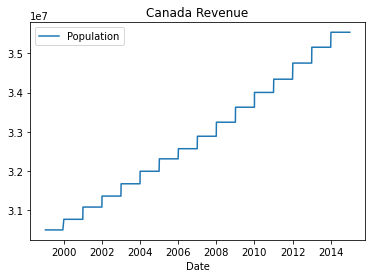

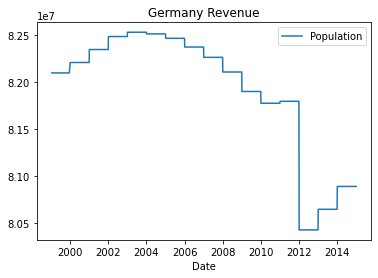

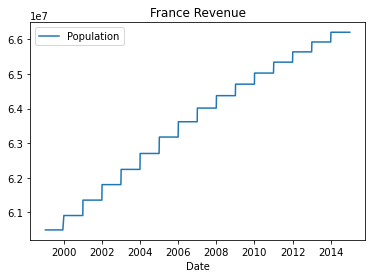

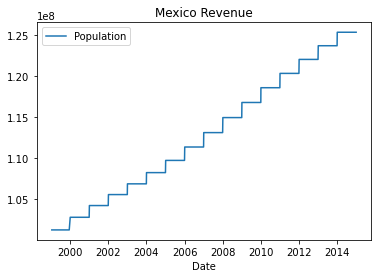

In [21]:
#IT'S ACTUALLY A GOOD PRACTICE TO ALSO ASK FOR THE REASON OF THESE REVENUE TRENDS.
#WE COULD START BY EXAMINING THE CORRELATION OF THE POPULATION TREND OF EACH COUNTRIES.

df_canada.plot(x='Date', y='Population', title = 'Canada Population')
df_germany.plot(x='Date', y='Population', title = 'Germany Population')
df_france.plot(x='Date', y='Population', title = 'France Population')
df_mexico.plot(x='Date', y='Population', title = 'Mexico Population')

1. Canada has the smallest population compared to the other 3 countries, which could be one good reason for its low revenue.
2. Mexico got the largest population.
3. France has smaller population compared to Mexico and Germany but still produced the highest amount of revenue.